In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
csv_path = "/content/drive/MyDrive/Colab Notebooks/IMDB_Dataset.csv"
df = pd.read_csv(csv_path)

In [ ]:
df.sample(5)

,review,sentiment
2257,This movie is silly and very short of being a ...,negative
22175,Especially if you love horrible movies. When I...,negative
26790,"its not as good as the first movie,but its a g...",positive
24984,Millie is a sap. She marries a rich guy named ...,negative
34868,Spoilers will be in this. The movie could have...,negative


In [ ]:
df.shape

(50000, 2)

1. Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['sentiment'] = encoder.fit_transform(df['sentiment'])

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [ ]:
# missing values
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
# check for duplicate values
df.duplicated().sum()

418

In [ ]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(49582, 2)

2. **EDA**

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [ ]:
df['sentiment'].value_counts()

1    24884
0    24698
Name: sentiment, dtype: int64

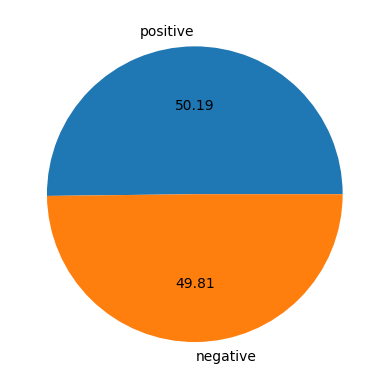

In [ ]:
import matplotlib.pyplot as plt
plt.pie(df['sentiment'].value_counts(), labels=['positive','negative'],autopct="%0.2f")
plt.show()

In [ ]:
import nltk

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df['num_characters'] = df['review'].apply(len)

In [ ]:
df.head()

,review,sentiment,num_characters
0,One of the other reviewers has mentioned that ...,1,1761
1,A wonderful little production. <br /><br />The...,1,998
2,I thought this was a wonderful way to spend ti...,1,926
3,Basically there's a family where a little boy ...,0,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1317


In [ ]:
# num of words
df['num_words'] = df['review'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,review,sentiment,num_characters,num_words
0,One of the other reviewers has mentioned that ...,1,1761,380
1,A wonderful little production. <br /><br />The...,1,998,201
2,I thought this was a wonderful way to spend ti...,1,926,205
3,Basically there's a family where a little boy ...,0,748,175
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1317,283


In [ ]:
df[['num_characters','num_words']].describe()

,num_characters,num_words
count,49582.000000,49582.000000
mean,1310.568230,279.711226
std,990.762238,208.167050
min,32.000000,8.000000
25%,699.000000,151.000000
50%,971.000000,209.000000
75%,1592.000000,340.000000
max,13704.000000,2911.000000


In [ ]:
# ham
df[df['sentiment'] == 0][['num_characters','num_words']].describe()

,num_characters,num_words
count,24698.000000,24698.000000
mean,1294.739615,278.771358
std,946.501793,201.449273
min,32.000000,8.000000
25%,706.000000,153.000000
50%,974.000000,211.000000
75%,1568.000000,338.000000
max,8969.000000,1936.000000


In [ ]:
#spam
df[df['sentiment'] == 1][['num_characters','num_words']].describe()

,num_characters,num_words
count,24884.000000,24884.000000
mean,1326.278532,280.644068
std,1032.597204,214.626786
min,65.000000,11.000000
25%,692.000000,148.000000
50%,969.000000,207.000000
75%,1615.250000,343.000000
max,13704.000000,2911.000000


In [ ]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

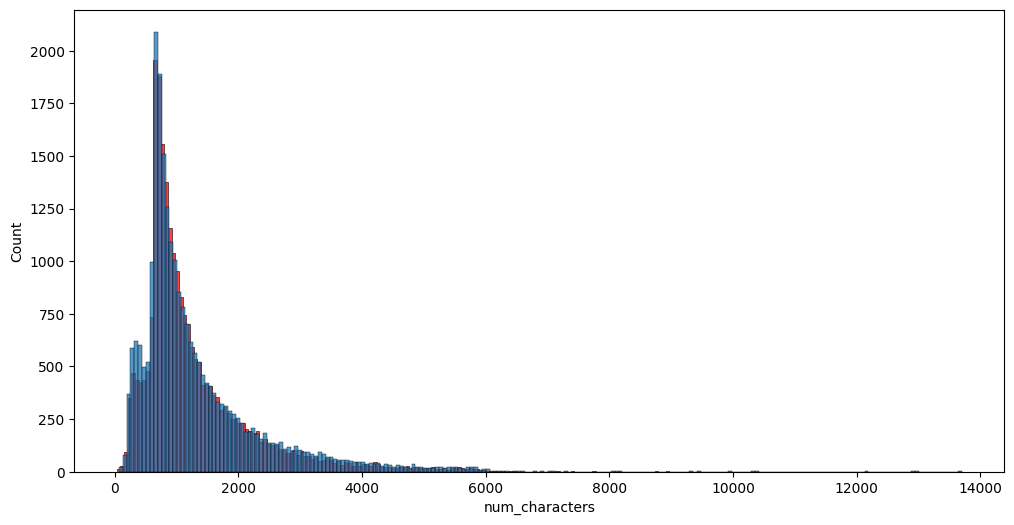

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['sentiment'] == 0]['num_characters'],color='red')
sns.histplot(df[df['sentiment'] == 1]['num_characters'])

<Axes: xlabel='num_words', ylabel='Count'>

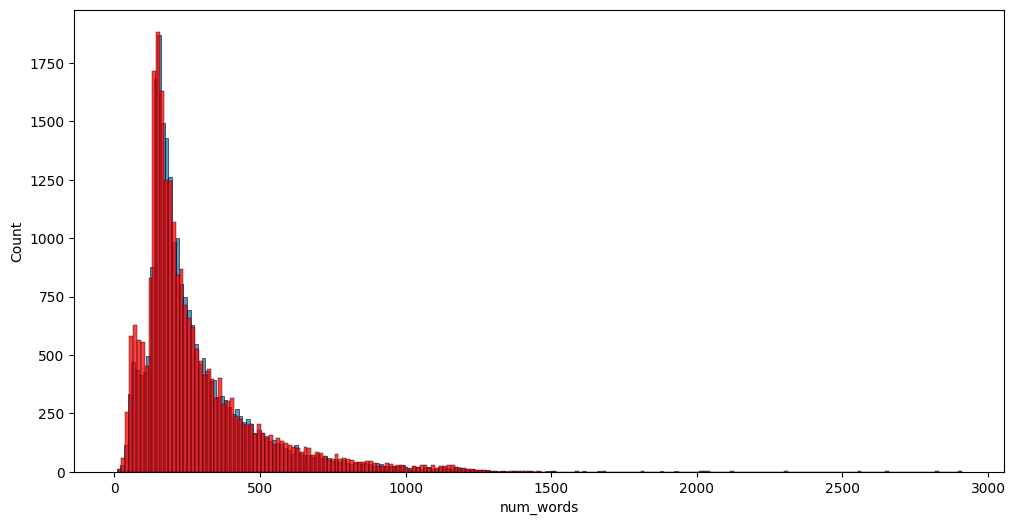

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['sentiment'] == 0]['num_words'])
sns.histplot(df[df['sentiment'] == 1]['num_words'],color='red')

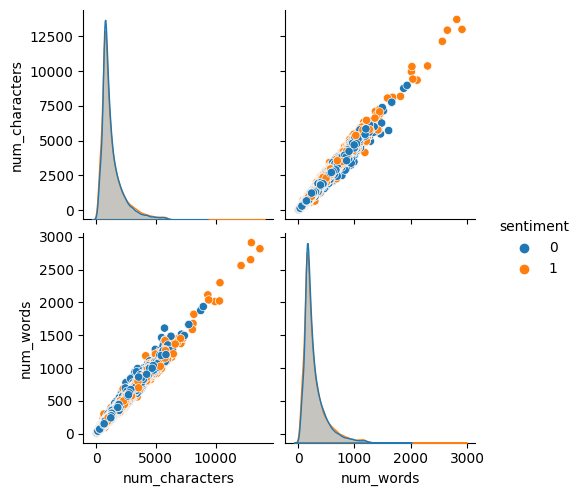

In [ ]:
sns.pairplot(df,hue='sentiment')

<ipython-input-31-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

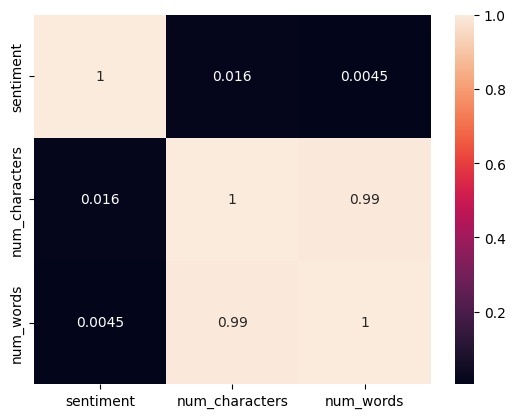

In [ ]:
sns.heatmap(df.corr(),annot=True)

3. **Data** **Preprocessing**

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stopwords.words('english')

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def transform_text(text):

  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
      if i not in stopwords.words('english') and i not in string.punctuation:
          y.append(i)

  text = y[:]
  y.clear()

  for i in text:
      y.append(ps.stem(i))


  return " ".join(y)

In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [ ]:
df['transformed_text'] = df['review'].apply(transform_text)

In [ ]:
df.head()

,review,sentiment,num_characters,num_words,transformed_text
0,One of the other reviewers has mentioned that ...,1,1761,380,one review mention watch 1 oz episod hook righ...
1,A wonderful little production. <br /><br />The...,1,998,201,wonder littl product br br film techniqu fashi...
2,I thought this was a wonderful way to spend ti...,1,926,205,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,0,748,175,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1317,283,petter mattei love time money visual stun film...


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [ ]:
positive_wc = wc.generate(df[df['sentiment'] == 1]['transformed_text'].str.cat(sep=" "))

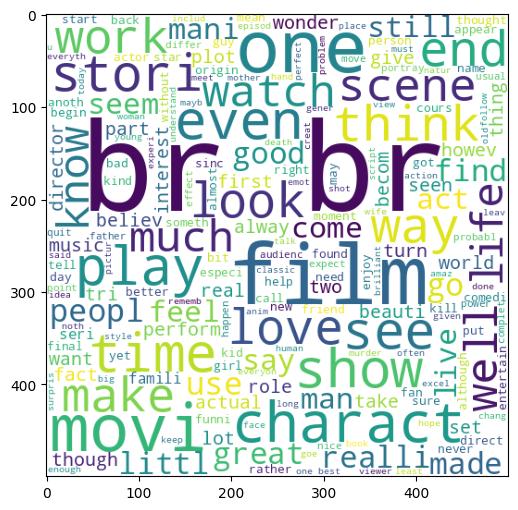

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(positive_wc)

In [ ]:
negative_wc = wc.generate(df[df['sentiment'] == 0]['transformed_text'].str.cat(sep=" "))

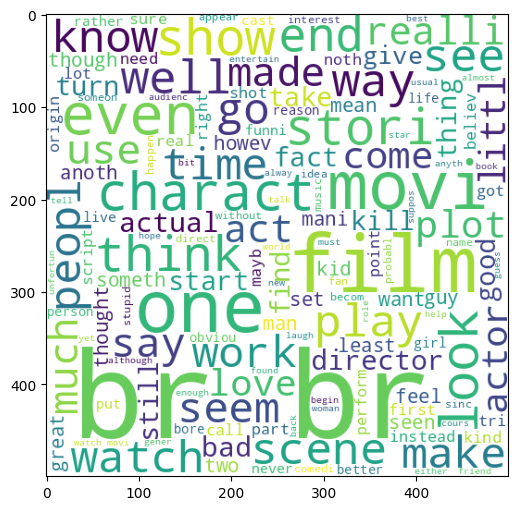

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(negative_wc)

In [ ]:
df.head()

,review,sentiment,num_characters,num_words,transformed_text
0,One of the other reviewers has mentioned that ...,1,1761,380,one review mention watch 1 oz episod hook righ...
1,A wonderful little production. <br /><br />The...,1,998,201,wonder littl product br br film techniqu fashi...
2,I thought this was a wonderful way to spend ti...,1,926,205,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,0,748,175,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,1317,283,petter mattei love time money visual stun film...


In [ ]:
positive_corpus = []
for msg in df[df['sentiment'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        positive_corpus.append(word)

In [ ]:
len(positive_corpus)

2987643

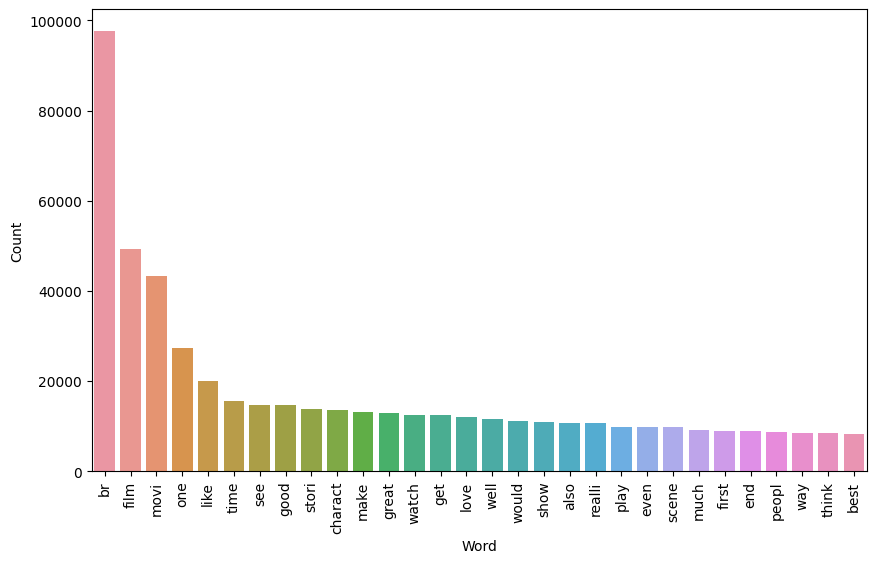

In [ ]:
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'positive_corpus' is your list of data
positive_corpus = Counter(positive_corpus)
most_common_words = positive_corpus.most_common(30)
most_common_df = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Count', data=most_common_df)
plt.xticks(rotation='vertical')
plt.show()


In [ ]:
negative_corpus = []
for msg in df[df['sentiment'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        negative_corpus.append(word)

In [ ]:
len(negative_corpus)

2885636

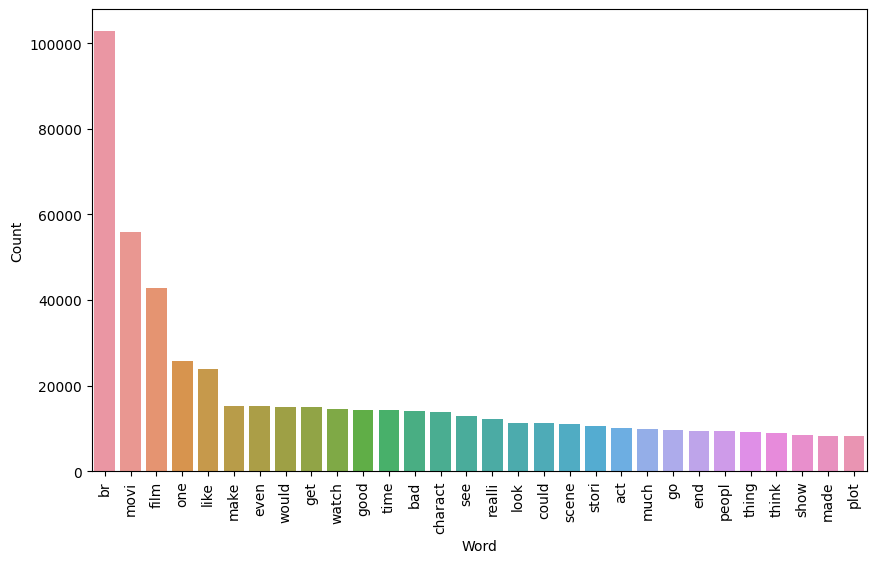

In [ ]:
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'negative_corpus' is your list of data
negative_counter = Counter(negative_corpus)
most_common_words = negative_counter.most_common(30)
most_common_df = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Word', y='Count', data=most_common_df)
plt.xticks(rotation='vertical')
plt.show()


In [ ]:
# Text Vectorization
# using Bag of Words
df.drop(columns=['review'],inplace=True)

In [ ]:
df.head()

,sentiment,num_characters,num_words,transformed_text
0,1,1761,380,one review mention watch 1 oz episod hook righ...
1,1,998,201,wonder littl product br br film techniqu fashi...
2,1,926,205,thought wonder way spend time hot summer weeke...
3,0,748,175,basic famili littl boy jake think zombi closet...
4,1,1317,283,petter mattei love time money visual stun film...


**4. Model Building**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [ ]:
X.shape

(49582, 3000)

In [ ]:
y = df['sentiment'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [ ]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('lr', lrc)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('lr',
                              LogisticRegression(penalty='l1',
                                                 solver='liblinear'))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.8809115659977816
Precision 0.8704208885424786


In [ ]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))